In [1]:
from deep_alchemy.blackjack import (
    Action,
    State,
    Timestep,
    BlackjackEnvironment,
    BlackjackMonteCarloAgent,
    train_agent,
    train_agent_notebook,
)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = BlackjackEnvironment()
agent = BlackjackMonteCarloAgent(alpha=5e-4, gamma=1.0, epsilon=0.1)

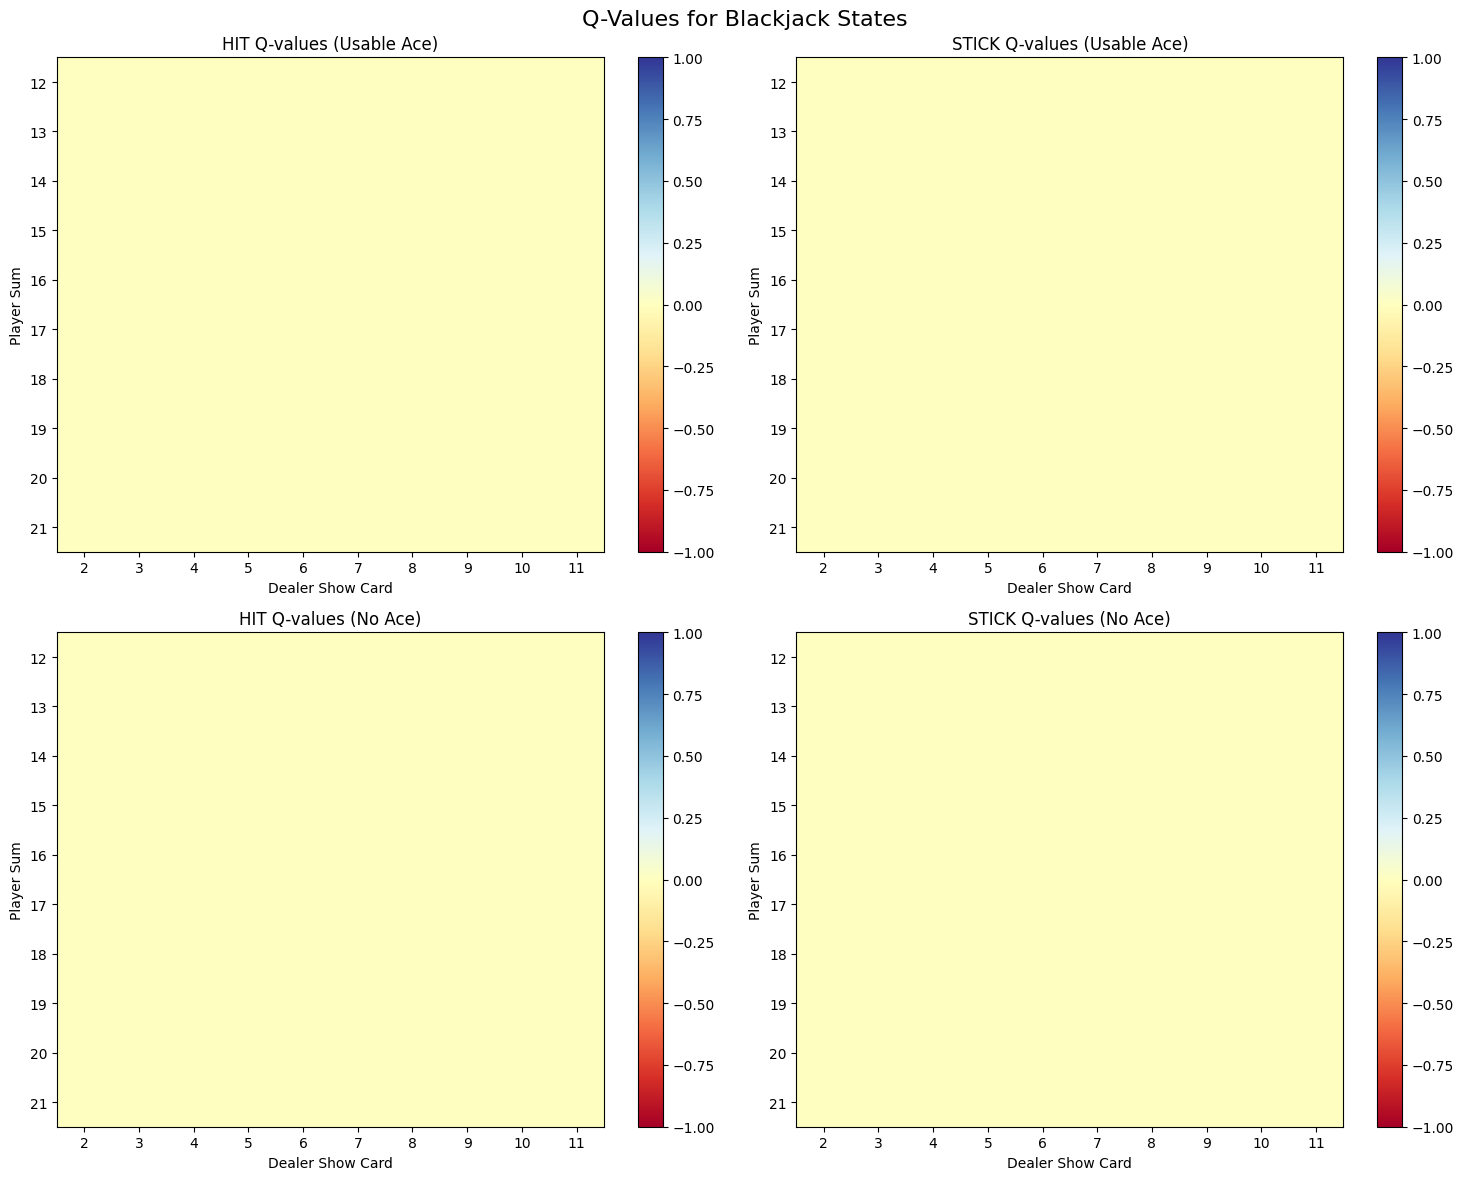

In [3]:
def plot_q_values(agent: BlackjackMonteCarloAgent):
    """
    Plot the Q-values as heatmaps for both usable and non-usable ace scenarios.
    Uses a fixed colormap range from -1.0 to 1.0 for better comparison.
    """
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Q-Values for Blackjack States", fontsize=16)

    # Prepare data arrays
    player_sums = list(range(12, 22))
    dealer_shows = list(range(2, 12))
    
    for ace in [True, False]:
        # Create matrices for HIT and STICK
        hit_matrix = np.zeros((len(player_sums), len(dealer_shows)))
        stick_matrix = np.zeros((len(player_sums), len(dealer_shows)))
        
        # Fill matrices
        for i, player_sum in enumerate(player_sums):
            for j, dealer_show in enumerate(dealer_shows):
                state = State(player_sum, dealer_show, ace)
                hit_matrix[i, j] = agent.Q[state][Action.HIT]
                stick_matrix[i, j] = agent.Q[state][Action.STICK]
        
        # Plot HIT values
        row = 0 if ace else 1
        ax = axes[row, 0]
        im = ax.imshow(hit_matrix, cmap='RdYlBu', aspect='auto', vmin=-1.0, vmax=1.0)
        ax.set_title(f'HIT Q-values ({"Usable" if ace else "No"} Ace)')
        ax.set_xlabel('Dealer Show Card')
        ax.set_ylabel('Player Sum')
        ax.set_xticks(range(len(dealer_shows)))
        ax.set_yticks(range(len(player_sums)))
        ax.set_xticklabels(dealer_shows)
        ax.set_yticklabels(player_sums)
        plt.colorbar(im, ax=ax)
        
        # Plot STICK values
        ax = axes[row, 1]
        im = ax.imshow(stick_matrix, cmap='RdYlBu', aspect='auto', vmin=-1.0, vmax=1.0)
        ax.set_title(f'STICK Q-values ({"Usable" if ace else "No"} Ace)')
        ax.set_xlabel('Dealer Show Card')
        ax.set_ylabel('Player Sum')
        ax.set_xticks(range(len(dealer_shows)))
        ax.set_yticks(range(len(player_sums)))
        ax.set_xticklabels(dealer_shows)
        ax.set_yticklabels(player_sums)
        plt.colorbar(im, ax=ax)

    plt.tight_layout()
    plt.show()

plot_q_values(agent)

Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 60000000/60000000 [17:07<00:00, 58411.08it/s, eval_reward=-0.045, q_change=0.00858]


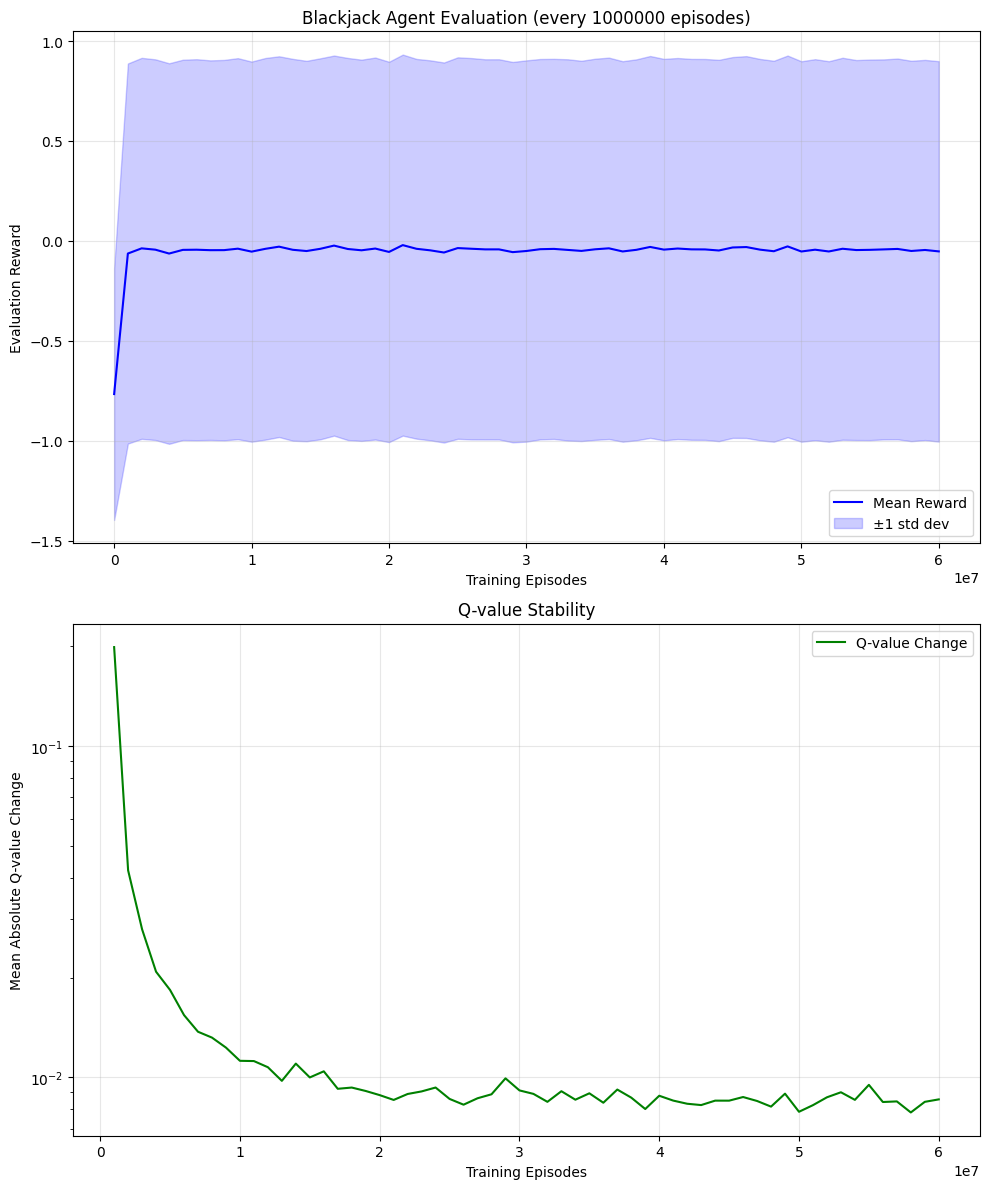

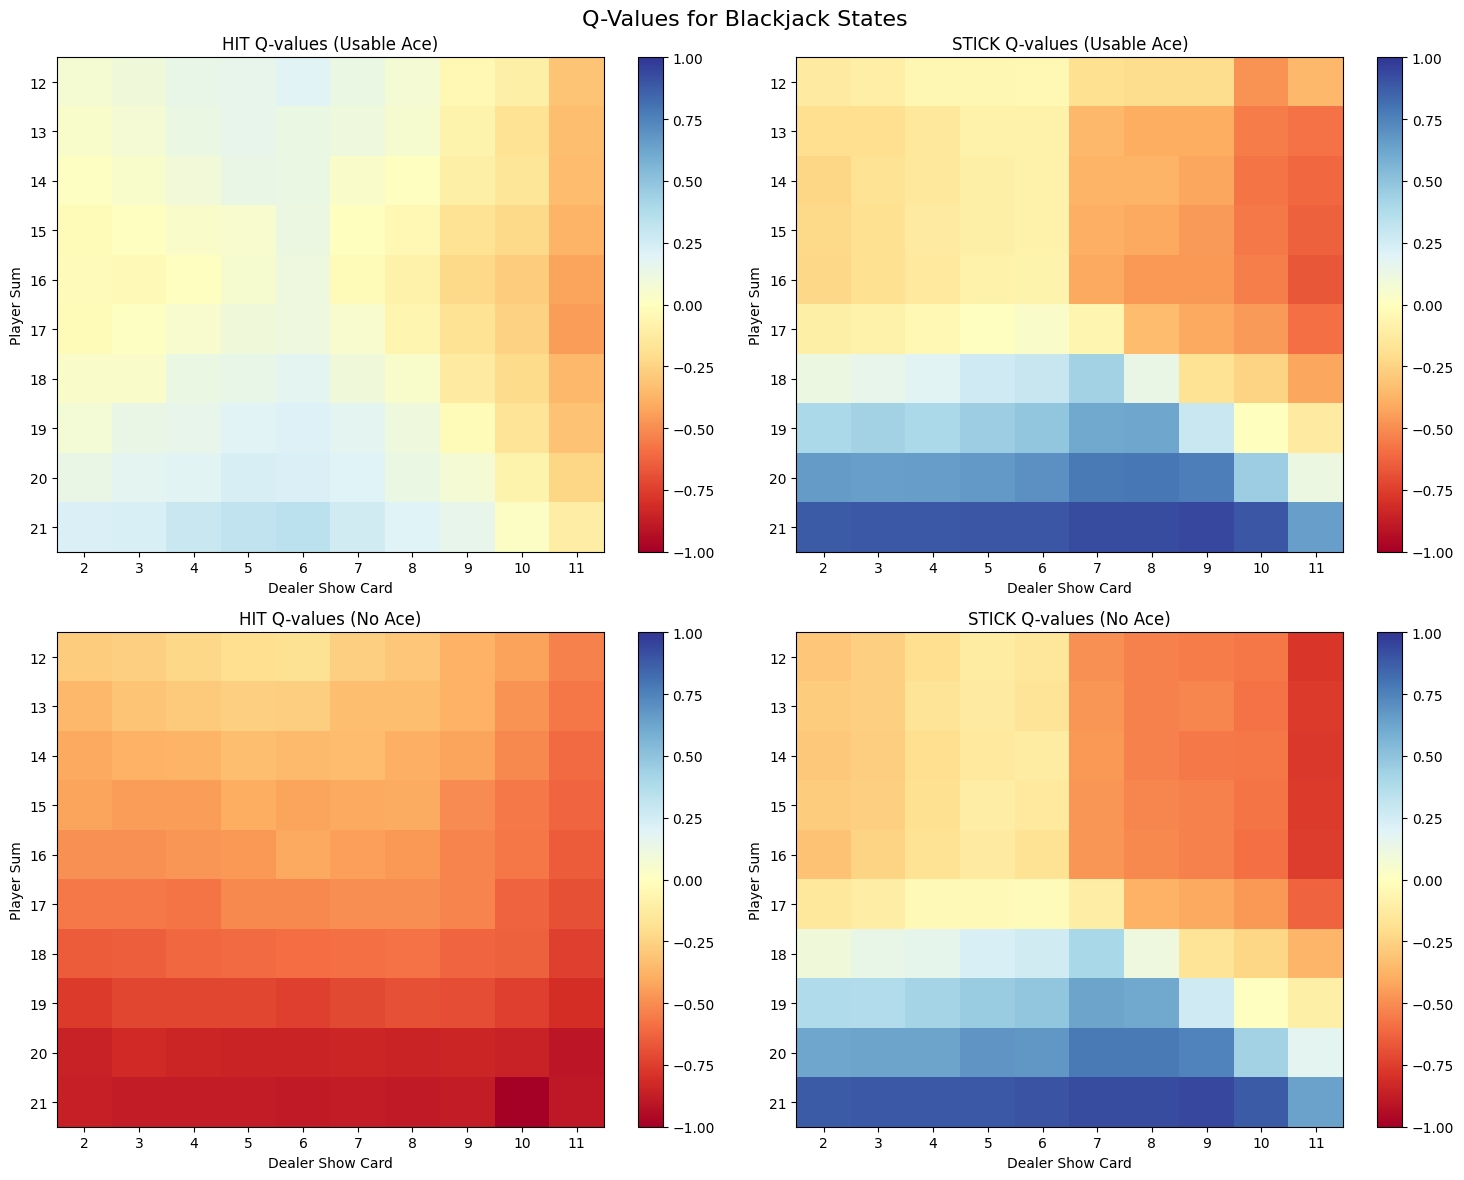

In [4]:
# This is optimized very early because even if the Q values are very wrong, as long as the
# argmax is correct, the policy will be correct. Would be great if we could graph something like
# the change in Q values over time and show that they stabilize.
# TODO: plot abs(g_t - Q_t) to show it approaches 0
train_agent_notebook(
    agent,
    env,
    num_episodes=30_000_000, 
    eval_episodes=10_000,
    eval_interval=1_000_000,
    show_progress=True,
)
plot_q_values(agent)